In [1]:
from qalphatools.factors.fundamentals import Fundamentals
from qalphatools.utils.zipline import register_data, build_pipeline_engine, get_pipeline_tickers, get_pricing, run_pipeline
from qalphatools.utils.cnn import generate_cnn_samples

import pandas as pd
import numpy as np
import time

from zipline.data import bundles
from zipline.utils.calendars import get_calendar 
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume

import matplotlib.pyplot as plt

In [2]:
# Register data
register_data(None, None, 'sep', 'daily')
# Load data bundle
bundle_data = bundles.load('sep')
# Select trading calendar
trading_calendar = get_calendar('NYSE')
# Initialize pipeline engine
engine = build_pipeline_engine(bundle_data, trading_calendar)

- Getting a stock universe with top 2000 stocks by market cap + 2000 top stocks by ADV
- Looking at stocks that stayed in this range from 2010 to 2020
- I get 1569 stocks

In [3]:
start_date = '2010-1-4'
end_date = '2020-5-19'
universe_start_date = pd.Timestamp(start_date, tz='UTC')
universe_end_date = pd.Timestamp(end_date, tz='UTC')
# Select universe of stocks
universe = Fundamentals().marketcap.top(2000) & AverageDollarVolume(window_length=120).top(2000)
pipeline = Pipeline(screen=universe)
#pipeline.add(Fundamentals().marketcap, 'universe')
all_factors = run_pipeline(engine, pipeline, universe_start_date, universe_end_date)
# Get all tickers for the stocks we're looking at
all_assets = get_pipeline_tickers(all_factors)

C:\Users\PC\Documents\GitHub\qalphatools\factors\fundamentals.py:75: RuntimeWarning: invalid value encountered in less_equal
  sids_to_increment = today.value >= self.data.date[np.arange(self.N), ind_p1]


In [4]:
sample_end_date = pd.Timestamp('2013-12-31')
pricing = get_pricing(all_assets, bundle_data, universe_start_date, universe_end_date)
#pricing_open = get_pricing(all_assets, bundle_data, universe_start_date, universe_end_date, 'open')
pricing = pricing.dropna(axis=1)
pricing = pricing[universe_start_date:sample_end_date]

In [6]:
t0 = time.time()

charts = generate_cnn_samples(pricing[pricing.columns[0:1]])
t1 = time.time()

print(t1-t0)

21.90300178527832


In [3]:
import pickle

In [56]:
li = []
for i in range(10):
    with open('cnn_samples/cnn_samples_{}.pickle'.format(i), 'rb') as pickle_file:
        li += pickle.load(pickle_file)


In [57]:
with open('mypickle.pickle', 'wb') as f:
    pickle.dump(li, f)

In [35]:
import PIL

In [1]:
from PIL import Image

In [53]:
li

[('A', '2010-07-06', <100x150 sparse matrix of type '<class 'numpy.int32'>'
  	with 747 stored elements in Compressed Sparse Row format>, -0.0013791640144281692),
 ('A', '2010-07-13', <100x150 sparse matrix of type '<class 'numpy.int32'>'
  	with 765 stored elements in Compressed Sparse Row format>, -0.009476309226932877),
 ('A', '2010-07-20', <100x150 sparse matrix of type '<class 'numpy.int32'>'
  	with 733 stored elements in Compressed Sparse Row format>, 0.017441258668874804),
 ('A', '2010-07-27', <100x150 sparse matrix of type '<class 'numpy.int32'>'
  	with 732 stored elements in Compressed Sparse Row format>, 0.009175290728688834),
 ('A', '2010-08-03', <100x150 sparse matrix of type '<class 'numpy.int32'>'
  	with 733 stored elements in Compressed Sparse Row format>, 0.017988809287245555),
 ('A', '2010-08-10', <100x150 sparse matrix of type '<class 'numpy.int32'>'
  	with 751 stored elements in Compressed Sparse Row format>, 0.06052660939417609),
 ('A', '2010-08-17', <100x150 sp

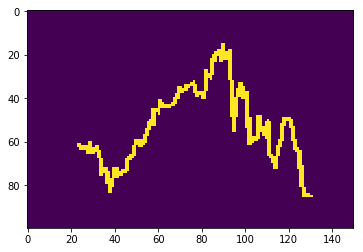

In [55]:
import matplotlib.pyplot as plt
plt.imshow(li[0][2].toarray())

In [22]:
import numpy as np

In [36]:
PIL.Image.frombytes('RGB', fig.canvas.get_width_height(),fig.canvas.tostring_rgb())

ValueError: not enough image data

In [39]:
help(PIL.Image.frombytes)

Help on function frombytes in module PIL.Image:

frombytes(mode, size, data, decoder_name='raw', *args)
    Creates a copy of an image memory from pixel data in a buffer.
    
    In its simplest form, this function takes three arguments
    (mode, size, and unpacked pixel data).
    
    You can also use any pixel decoder supported by PIL.  For more
    information on available decoders, see the section
    :ref:`Writing Your Own File Decoder <file-decoders>`.
    
    Note that this function decodes pixel data only, not entire images.
    If you have an entire image in a string, wrap it in a
    :py:class:`~io.BytesIO` object, and use :py:func:`~PIL.Image.open` to load
    it.
    
    :param mode: The image mode. See: :ref:`concept-modes`.
    :param size: The image size.
    :param data: A byte buffer containing raw data for the given mode.
    :param decoder_name: What decoder to use.
    :param args: Additional parameters for the given decoder.
    :returns: An :py:class:`~PIL.Im

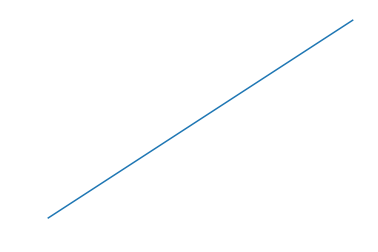

In [49]:
fig, ax = plt.subplots()
ax.plot(range(100))
ax.axis('off')
fig.canvas.draw()
x = PIL.Image.frombytes('L', fig.canvas.get_width_height(),fig.canvas.tostring_rgb()).resize((150,100))

In [50]:
plt.imshow(x)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002E632D1DE18> (for post_execute):


AttributeError: 'numpy.ndarray' object has no attribute 'mask'

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

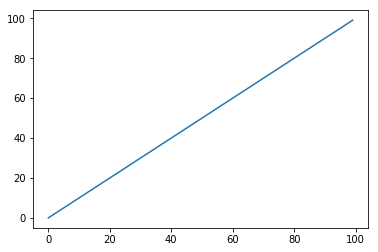

In [33]:
fig, ax = plt.subplots()
ax.plot(range(100))


In [27]:
import json
s = json.dumps(li)
open("out.json","w").write(s)

TypeError: array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]) is not JSON serializable

In [ ]:
#plt.imshow(charts[200][2])
#plt.title(charts[200][0] + ' , 6M, ' + str(charts[200][1].date()))